In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

In [28]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


In [5]:
#Looking at train to see means of values for each field when action 0 vs 1
#Looks like means of each field are relatively similar
train.groupby('ACTION').mean()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,,,,,,,,,
0,42898.348972,26737.799157,117553.749605,118206.734844,118834.391144,127189.345809,169178.854507,183499.856089,119389.313126
1,42925.487205,25942.943735,116915.690496,118307.666073,118917.596690,125837.918405,170239.787121,183715.916656,119814.016228


In [6]:
# show plots in the notebook
%matplotlib inline

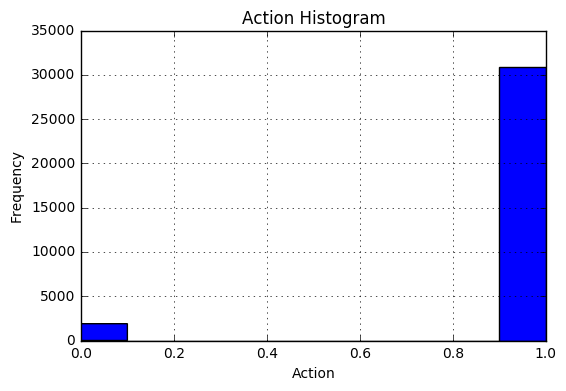

In [8]:
#Looking at frequency of action items
train.ACTION.hist()
plt.title("Action Histogram")
plt.xlabel("Action")
plt.ylabel("Frequency")

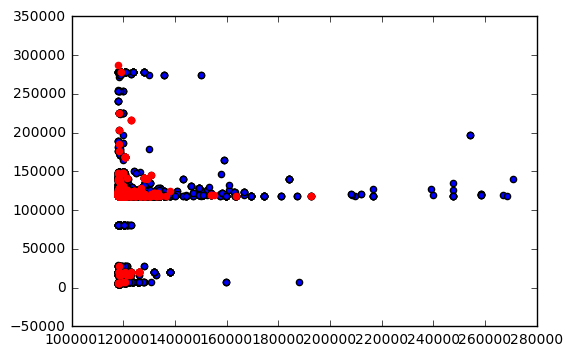

In [48]:
plt.scatter(train.ROLE_CODE[train.ACTION == 1], train.ROLE_DEPTNAME[train.ACTION == 1])
plt.scatter(train.ROLE_CODE[train.ACTION == 0], train.ROLE_DEPTNAME[train.ACTION == 0], color='r')
plt.show()

In [53]:
y = train.ACTION
X_train = train.drop('ACTION', 1)

# Logistic Regression

In [54]:
model = LogisticRegression()
model = model.fit(X_train,y)

model.score(X_train,y)

0.94210992096188473

In [55]:
#score equals mean so most likely overfitting the data
y.mean()

0.9421099209618847

Let's try this model on test data

In [56]:
print(model.coef_)

[[ -3.78099321e-08  -4.79862015e-07  -5.93121953e-06   4.82307717e-06
    2.09499703e-07  -1.62405803e-06   2.42775664e-07   1.94869164e-07
    2.53632090e-05]]


In [57]:
X_test = test.drop('id', 1)
predict = model.predict(X_test)
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
prediction = [test.id, predict.T]
prediction = pd.DataFrame(prediction)
prediction = prediction.T
prediction.columns = ['id', 'Action']
#print(prediction)

In [59]:
prediction.to_csv("logistic_prediction.csv", index=False)

In [60]:
model2 = LogisticRegression(penalty='l1')
model2 = model2.fit(X_train, y)

model2.score(X_train, y)

0.94210992096188473

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y)

model3.score(X_train, y)

0.99615490249931338

In [72]:
predict = model3.predict(X_test)
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [73]:
prediction = [test.id, predict.T]
prediction = pd.DataFrame(prediction)
prediction = prediction.T
prediction.columns = ['id', 'Action']

In [75]:
prediction.to_csv("random_forest_pred.csv", index=False)